In [52]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# (1) Veri Seti İncelemesi
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [53]:
# Model Eğitimi
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X = cancer.data # features
y = cancer.target # target

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # veri setini train ve test olarak ayırır
# knn.fit(X_train,y_train) # fit fonksiyonu  (samples + targets) kullanarak knn algoritmasını eğitir

In [54]:
from sklearn.preprocessing import StandardScaler

# Veri setini ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)# Komşu parametresi 3 seçildi
knn.fit(X_train, y_train) # Model eğitimi

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = knn.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred) # doğruluk oranını hesaplar
print("Doğruluk:{:.3f}".format(accuracy))

Doğruluk:0.959


In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred,labels=[1,0]) # karışıklık matrisini hesaplar
print(cm)

[[105   3]
 [  4  59]]


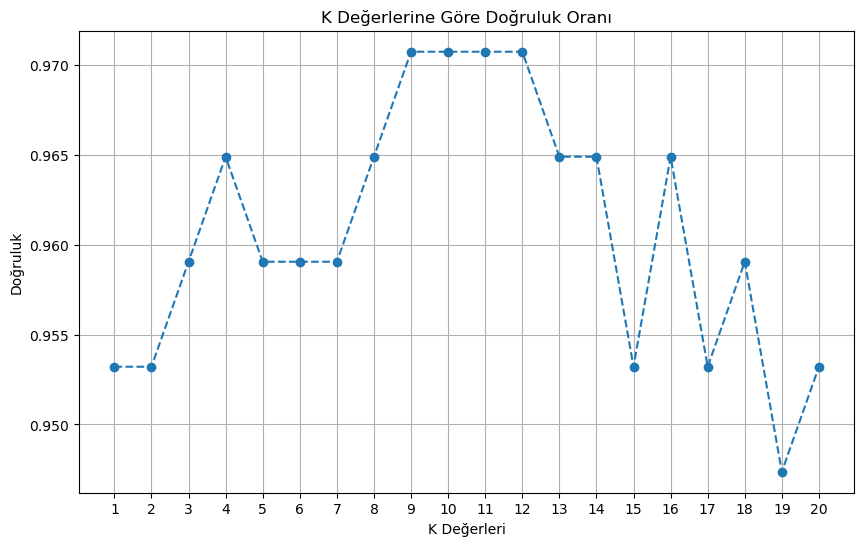

In [73]:
import matplotlib.pyplot as plt


## Hiperparametre ayarlaması
"""
K komşu sayiyisini belirlemek için en iyi yol, modelinizi birçok farklı K değeriyle eğitmek ve ardından her birinin performansını test etmektir.
"""

accuracy_values = []
k_values = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

plt.figure(figsize=(10,6))
plt.plot(k_values,accuracy_values,marker="o",linestyle="--")
plt.xlabel("K Değerleri")
plt.ylabel("Doğruluk")
plt.title("K Değerlerine Göre Doğruluk Oranı")
plt.xticks(k_values)
plt.grid(True)